# Systems of Ordinary Differential Equations

Previously we studied systems where there was only one interesting variable so the differential equation describe only changes on that variable. There are systems where the state is described by two or more variables. In this case, we have several differential equations, like the following
$$\frac{dx}{dt} = f_1(x, y, t)\\
\frac{dy}{dt} = f_2(x, y, t),$$
where $x$ and $y$ are variables that describe the system state  and $f_1$ and $f_2$ are the functions describing their derivatives. To solve this system and improve the notation we can think of $x$ and $y$ as the components of a state vector called, for example, $\vec s = [x, y]$. Also, the function $f_1$ and $f_2$ can be seen as the components of a vector, let's call it $\vec f = [f_1, f_2]$. By using this , we can rewrite the system as
$$\frac{d\vec s}{dt} = \vec f(\vec s, t).$$
Solving this system is similar to what we did with the Euler, only that now everything is vectorial, but the same basic equation applies:
$$\vec s_{i+1} = \vec s_i + \vec f \delta t.$$
Therefore, you need to define a function to model $\vec f$ that receives the state vector $\vec s$, the current time, and returns the derivatives. 

In [1]:
# Generalizing Euler for a system of ODE
import numpy as np

def euler(t, y0, dt):
    """
    This function computes the solution of an ODE system using the Euler method.
    For now it works only for 2D systems
    INPUT:
    t  = numpy array of time steps
    y0 = *VECTOR OF* float, initial conditions
    dt = time steps
    RETURNS:
    y = *MATRIX* of shape (len(t), len(y0)) with the solution as (y0, y1, y2 , ..., yn)
    """
    y = np.zeros((len(t), len(y0))) # creates the *matrix* to save the solution
    y[0, 0] = y0[0] # save the initial condition
    y[0, 1] = y0[1] # save the initial condition
    for ii in range(1, len(t)) :
        tstep = t[ii-1]
        y[ii] = y[ii-1] + fderiv(y[ii-1], tstep)*dt
        #y[ii, 0] = y[ii-1, 0] + fderiv(y[ii-1, :], tstep)*dt
        #y[ii, 1] = y[ii-1, 1] + fderiv(y[ii-1, :], tstep)*dt        
    return y

In [ ]:
# example for fderiv, adapt to your own problem. It now returns a vector.
def fderiv(y, t):
    return np.array([-y[0]+2*y[1], y[0]])

t = np.arange(1,2,0.1)
y0 = np.array([-2, 0])
sol = euler(t, y0, 0.1)
print(sol)

# TIP : Copy this and the previous cell into the python tutor to see execution

## Exercise (From Chapra)
(22.6) Suppose that a projectile is launched upward from the earth's surface. Assume that the only force acting on the object is the downward force of gravity. Under these conditions, a force balance can be used to derive
$$
\frac{dv}{dt} = -g(0)\frac{R^2}{(R+x)^2},
$$
where $v =$ upward velocity (m/s), $t =$ time (s), $x =$ altitude (m) measured upward from the earth’s surface, $g(0) =$ the gravitational acceleration at the earth’s surface ($\simeq 9.81$ m/s$^2$), and $R =$ the earth's radius ($\simeq 6.37\times 10^6$ m). Recognizing that $dx/dt = v$, use Euler's method to determine the maximum height that would be obtained if $v(t = 0) = 1500$ m/s.

In [3]:
# Solution using a system of equations
# example for fderiv, adapt to your own problem. It now returns a vector.
def fderiv(y, t):
    return np.array([y[1], -G*R**2/(R+y[0])**2])

G = 9.81
R = 6.37e6
DT = 0.1

t = np.arange(0, 200, DT)
y0 = np.array([0, 1500])
sol = euler(t, y0, DT)
print(sol)
# TIP : Copy this and the previous cell into the python tutor to see execution

[[     0.           1500.        ]
 [   150.           1499.019     ]
 [   299.9019       1498.0380462 ]
 ...
 [108108.58204661   -407.54571851]
 [108067.82747476   -408.49424928]
 [108026.97804983   -409.44279199]]


116855.3880993685


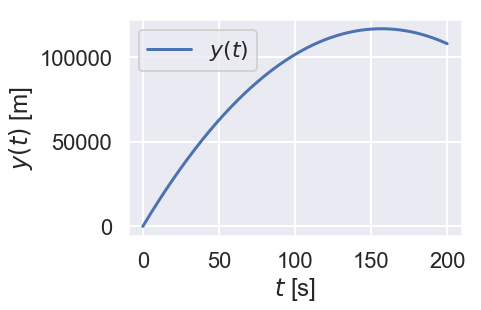

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots()
ax.plot(t, sol[:, 0], label=r"$y(t)$")
ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$y(t)$ [m]")
ax.legend()

print(np.max(sol[:, 0]))

# Runge-kutta (RK) methods: very short introduction

Remember that a Taylor expansion of order $n$ is 
$$
f(t+\delta t) = f(t) + \delta t \frac{df}{dt} + \frac{dt^2}{2}\frac{d^2 f}{dt^2} + \ldots = \sum_{k=0}\frac{\delta t^k}{k!} \frac{d^k f}{dx^k}, 
$$
so you need high order  derivatives to get high order approximations. Runge-Kutta methods achieve the accuracy of Taylor expansions without using higher order derivatives. They do this by evaluating the function several times at special points within the time interval. A general RK method can be written as 
$$
y_{i+1} = y_i + \delta t\phi,
$$
where $\phi$ is called the _increment function_ and geometrically is kind of a slope. This function can be written as 
$$
\phi = a_1 k_1 + a_2 k_2 + \ldots a_n k_n,
$$
where each $k_i$ is a recursive function like
$$
k_3 = f(t_i + p_2\delta t, y_i + q_{21}k_1\delta t + q_{22}k_2\delta t).
$$
In the end the secret is choose wisely the constants $p$'s and $q'$s to minimize something like the global error. 

The more famous RK method is the one of order 4, written as 
$$
y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2 k_3 + k_4)\delta t,
$$
where
$$
k_1 = f(t_i, y_i),
$$
$$
k_2 = f\left( t_i + \frac{\delta t}{2}, y_i + \frac{k_1 \delta t}{2} \right),
$$
$$
k_3 = f\left( t_i + \frac{\delta t}{2}, y_i + \frac{k_2 \delta t}{2} \right),
$$
$$
k_4 = f\left( t_i + \delta t, y_i + k_3 \delta t \right).
$$
The following figure demonstrates the geometrical interpretation for these expressions (source: Chapra):

<img src="fig/rk4.png">

Implementing the RK4 method is very simple and **it is left as an exercise**. There are some scipy functions that you can use, like https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html .

In [7]:
# Implementing the RK4 method

# Finally, scipy!

The official docs for the modern method to use from scipy to solve a system of ordinary differential equations is found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp . Please go read it and then come back to try it.

In [15]:
# Simple example for scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp
def exponential_decay(t, y): 
    return -0.5 * y

sol = solve_ivp(exponential_decay, t_span=[0, 10], y0=[2, 4, 8])
print(sol.t)
print(sol.y)

[ 0.          0.11487653  1.26364188  3.06061781  4.85759374  6.65456967
  8.4515456  10.        ]
[[2.         1.88836035 1.06327177 0.43319312 0.17648948 0.0719045
  0.02929499 0.01350938]
 [4.         3.7767207  2.12654355 0.86638624 0.35297895 0.143809
  0.05858998 0.02701876]
 [8.         7.5534414  4.25308709 1.73277247 0.7059579  0.287618
  0.11717996 0.05403753]]


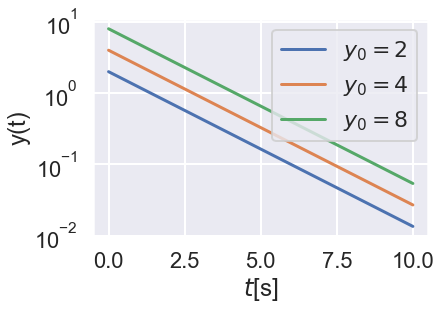

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label=r"$y_0 = 2$")
ax.plot(sol.t, sol.y[1], label=r"$y_0 = 4$")
ax.plot(sol.t, sol.y[2], label=r"$y_0 = 8$")

ax.set_yscale('log')

ax.set_xlabel(r"$t$[s]")
ax.set_ylabel(r"y(t)")
ax.legend()

## Example: Predator prey model
The Lokta-Volterra equation is a non-linear model for the interaction between a population of preys and predators. The simplest version is as follows:
$$
\frac{dx}{dt} = ax - bxy,
$$
$$
\frac{dy}{dt} = -cy + dxy,
$$
where $x$ and $y$ are the number of prey and predators, respectively, $a$ the prey growth rate, $c$ the predator death rate and $b$ and $d$ characterizes the effect of the interaction.

Solve the system for the following parameters and plot the solution and also plot $y$ as a function of $x$ (this is called the phase plane, more on this later): $a = 1.2, b  = 0.6, c = 0.8, d = 0.3$. Take the initial conditions as $x(0) = 2$ and $y(0) = 1$, integrate from $t= 0$ to $50$, with $\delta t = 0.0625$. 

Text(0,0.5,'$y$')

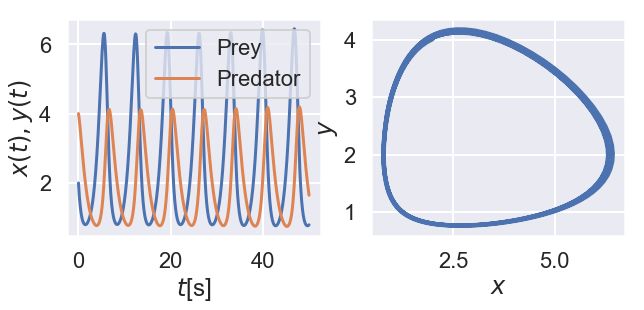

In [20]:
from scipy.integrate import solve_ivp
import numpy as np

A=1.2
B=0.6
C=0.8
D=0.3

X0=2
Y0=4
T0=0
TF=50
DT=0.0625

def fderiv(t, y): 
    return np.array([A*y[0] - B*y[0]*y[1], -C*y[1] + D*y[0]*y[1]])

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[X0, Y0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].plot(sol.t, sol.y[0], label=r"Prey")
ax[0].plot(sol.t, sol.y[1], label=r"Predator")
ax[0].set_xlabel(r"$t$[s]")
ax[0].set_ylabel(r"$x(t), y(t)$")
ax[0].legend()
ax[1].plot(sol.y[0], sol.y[1])
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")

# Can you compoute the critical points?

# Example : Lorenz model
A famous model showing chaotic behavior is the climate model proposed by Lorenz, 
$$
\frac{dx}{dt} = -a x + a y,
$$
$$
\frac{dy}{dt} = rx -y -xz,
$$
$$
\frac{dz}{dt} = -bz + xy.
$$
Solve the model for two very close initial conditions. And compare. Do you note something special? Also, for one of those initial conditions, plot the phase portrait in 2D and 3D. Use $a=10, b=8/3, r=28, x(0) = y(0) = z(0) = 5$, integrate from $t = 0$ to 20, and use $\delta t = 0.03125$. 

Text(0,0.5,'$y$')

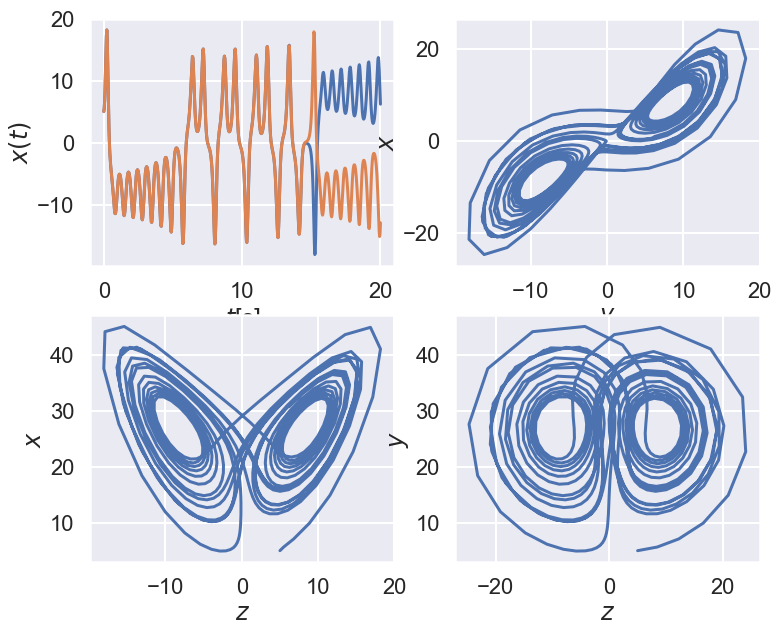

In [22]:
# Lorenz model
from scipy.integrate import solve_ivp
import numpy as np

A=10.0
B=8.0/3.0
R=28.0

X0=5
Y0=5
Z0=5
T0=0
TF=20
DT=0.03125

def fderiv(t, y): 
    return np.array([-A*y[0] + A*y[1], 
                     R*y[0] -y[1] - y[0]*y[2], 
                     -B*y[2] + y[0]*y[1]])

sol1 = solve_ivp(fderiv, t_span=[T0, TF], 
                t_eval=np.arange(T0, TF+DT, DT), 
                y0=[X0, Y0, Z0])
sol2 = solve_ivp(fderiv, t_span=[T0, TF], 
                t_eval=np.arange(T0, TF+DT, DT), 
                y0=[X0+0.0001, Y0, Z0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(2,2, figsize=(12, 10))
ax[0, 0].plot(sol1.t, sol1.y[0])
ax[0, 0].plot(sol2.t, sol2.y[0])
ax[0, 0].set_xlabel(r"$t$[s]")
ax[0, 0].set_ylabel(r"$x(t)$")
ax[0, 1].plot(sol1.y[0], sol1.y[1])
ax[0, 1].set_xlabel(r"$y$")
ax[0, 1].set_ylabel(r"$x$")
ax[1, 0].plot(sol1.y[0], sol1.y[2])
ax[1, 0].set_xlabel(r"$z$")
ax[1, 0].set_ylabel(r"$x$")
ax[1, 1].plot(sol1.y[1], sol1.y[2])
ax[1, 1].set_xlabel(r"$z$")
ax[1, 1].set_ylabel(r"$y$")

# See : https://www.youtube.com/watch?v=aAJkLh76QnM&t=2s

<IPython.core.display.Javascript object>


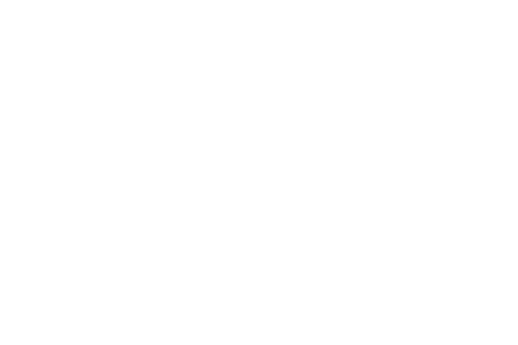

<IPython.core.display.Javascript object>


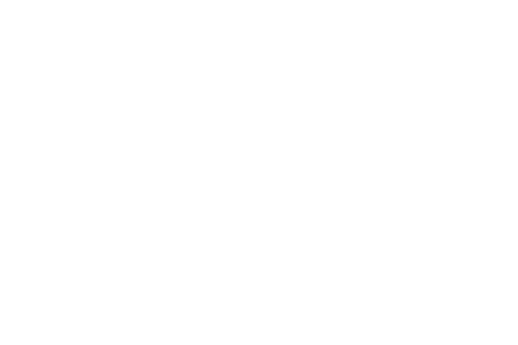

In [26]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol1.y[0], sol1.y[1], sol1.y[2])


In [27]:
import ipyvolume as ipv
import numpy as np
x, y, z = sol1.y[0], sol1.y[1], sol1.y[2]
#ipv.quickscatter(x, y, z, size=1, marker="sphere")
ipv.plot(x, y, z, size=0.01, marker="sphere")
ipv.show()

# Exercises

## Previous exercises: projectile
Implement the projectile exercise using the scipy library and plot the solutions. Test the largest $\delta t$. 

## Previous exercises: projectile with event
Implement the projectile exercise using the scipy library and plot the solutions. Implement and event to tell when the velocity is less than zero and then print the position. That will be the maximum position. Plot the maximum position as a function of the inicial velocity. 

## The Harmonic oscillator

The harmonic oscillator is a paradigmatic example used in many applications, not only physics but also biology.
It is described by the following equation,
$$\frac{d^2x}{dt^2} = -\frac{k}{m} x,$$
where $x$ is the elongation, $k$ the elastic constant, and $m$ the mass attached the spring. The theoretical solution is 
$$x(t) = A\cos(\omega t + \phi),$$
where $A$ is the amplitude and $\phi$ the phase (both of which depend on the initial condition). And $\omega = \sqrt{k/m}$ is the frequency. 

In order to solve the previous differential equation, we need to transform it into a system of first order equations. We do this by introducing a new variable, the velocity, which is the derivative of the position, so now we have $\vec s = [x, v]$ and
$$
\frac{dx}{dt} = v,\\
\frac{dv}{dt} = -\frac{k}{m} x,
$$
so $\vec f = [v, -\frac{k}{m} x]$ . 

The exercise is to solve the previous equation for both the position and the velocity and to compare with the theoretical solution, using the Euler method. Choose the following : $k = 1.234$, $m=2.345$, $t \in [0, 2.2\pi/\omega]$, $x(0) = 0.45$, $v(0) = 0$, $\delta t = 0.2\pi/\omega$.

## Chapra : Linear system
<img src="fig/chapra-01.png">

## Chapra: Nonlinear pendulum
<img src="fig/chapra-02.png">

## Chapra: Chemical reaction
<img src="fig/chapra-03.png">

## Chapra: Modified Lokta-Volterra
<img src="fig/chapra-04-A.png">
<img src="fig/chapra-04-B.png">


Text(0,0.5,'$y$')

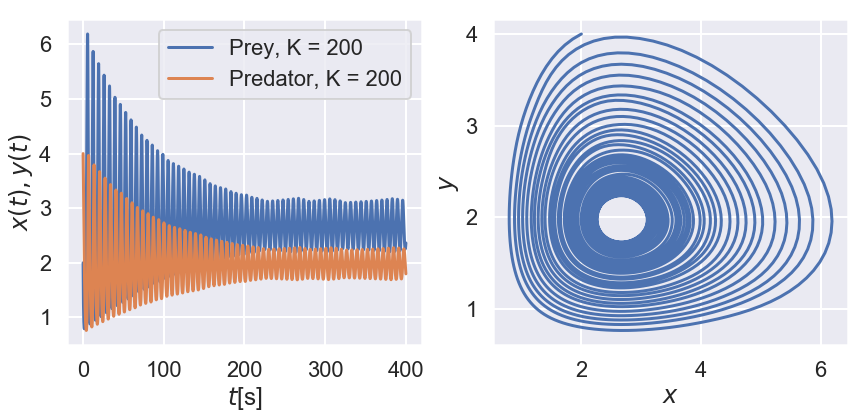

In [38]:
from scipy.integrate import solve_ivp
import numpy as np

A=1.2
B=0.6
C=0.8
D=0.3
K=200

X0=2
Y0=4
T0=0
TF=400
DT=0.0625

def fderiv(t, y): 
    return np.array([A*(1-y[0]/K)*y[0] - B*y[0]*y[1], -C*y[1] + D*y[0]*y[1]])

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[X0, Y0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].plot(sol.t, sol.y[0], label=r"Prey, K = {}".format(K))
ax[0].plot(sol.t, sol.y[1], label=r"Predator, K = {}".format(K))
ax[0].set_xlabel(r"$t$[s]")
ax[0].set_ylabel(r"$x(t), y(t)$")
ax[0].legend()
ax[1].plot(sol.y[0], sol.y[1])
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")


## Ward: Integral
<img src="fig/ward-01.png">

[1.00000000e+00 1.01000006e+00 1.02000044e+00 ... 1.22534402e+03
 1.23621304e+03 1.24717804e+03]


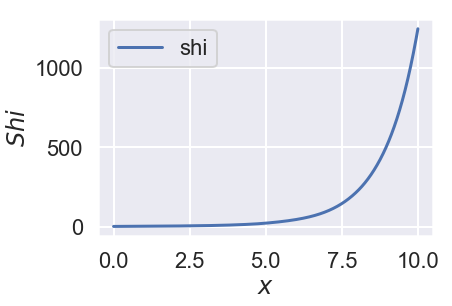

In [48]:
from scipy.integrate import solve_ivp
import numpy as np

X0=1
T0=0
TF=10
DT=0.01

def fderiv(t, y): 
    if t == 0:
        return 1
    return np.array([np.sinh(t)/t])

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[X0])
print(sol.y[0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label=r"shi")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$Shi$")
ax.legend()

## kiusalaas : Bouyancy
<img src="fig/kiusalaas-02-A.png">
<img src="fig/kiusalaas-02-B.png">


## kiusalaas: Real Projectiles
<img src="fig/kiusalaas-03.png">

## kiusalaas: Circuits
Solve this and also simulate the circuit at www.falstad.com to compare.
<img src="fig/kiusalaas-04.png">